In [3]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from numpy.linalg import norm
from operator import mul
from functools import reduce
from itertools import permutations 
from tqdm import tqdm
# import tensorflow as tf

# import tensorflow_graphics.geometry.transformation as tfg_transformation

Firstly we define a method to rotate the matrix. 

In [4]:
def rotation_matrix(input_vector,center,radians):
    theta = np.radians(-radians)
    c, s = np.cos(theta), np.sin(theta)
    ret = np.zeros_like(input_vector)
    cx, cy = center
    for i in range(input_vector.shape[0]):
        px, py = input_vector[i]
        ret[i] = np.array([
            c*(px-cx)-s*(py-cy)+cx,
            s*(px-cx)+c*(py-cy)+cy])
    return ret

Next we put the whole snowflake into a nested array

In [5]:
def koch_iter(input_trig=np.array([[0,0],[1/2,sqrt(3)/6],[1,0]]),iteration=4,section=0):
    if iteration ==0:
        return input_trig
    part1 = (input_trig-input_trig[0])/3+input_trig[0]
    part2 = rotation_matrix(part1,part1[0],-60)+(part1[2]-part1[0])
    part3 = rotation_matrix(part1,part1[2],60)+(part1[2]-part1[0])
    part4 = (input_trig-input_trig[2])/3+input_trig[2]
    for i in [part1,part2,part3,part4]:
        for j in i:
            plt.scatter(j[0],j[1],c="purple",marker=".")
            plt.title(f"Fig.3 Plot after {iteration} iterations")
        plt.ylim((0,0.5))
    return np.array([koch_iter(input_trig=part1,iteration=iteration-1,section=1),
                     koch_iter(input_trig=part2,iteration=iteration-1,section=2),
                     koch_iter(input_trig=part3,iteration=iteration-1,section=3),
                     koch_iter(input_trig=part4,iteration=iteration-1,section=4)])

This is an example for a 2-iter snowflake

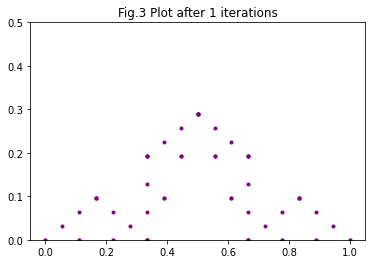

In [7]:
trig = koch_iter(iteration=2,section=0)

In [8]:
def cal_diameter(arr):
    temp_arr = arr.reshape(reduce(mul,arr.shape[:-1]),2)
    max_val = 0
    all_sets = permutations(temp_arr,2)
    for i in all_sets:
        _l2 = norm(abs(i[1]-i[0]),2)
        max_val = max(max_val,_l2)
    return max_val

In [9]:
def solve(iterations):
    trig = koch_iter(input_trig=np.array([[0,0],[1/2,sqrt(3)/6],[1,0]]),iteration=iterations,section=0)
    trig = trig.reshape(reduce(mul,trig.shape[:-2]),3,2)
    def eval_diameter(k):
        nonlocal trig
        min_val = 1
        for i in range(trig.shape[0]-k):
            min_val = min(cal_diameter(trig[i:i+k]),min_val)
        return min_val
    for k in tqdm(range(1,4**iterations)):
        print(f'i = {iterations}, k = {k}, diameter of the lower bound cover: {eval_diameter(k)}')

  1%|          | 3/255 [00:00<00:16, 15.44it/s]

i = 4, k = 1, diameter of the lower bound cover: 0.012345679012345604
i = 4, k = 2, diameter of the lower bound cover: 0.01425556220221293
i = 4, k = 3, diameter of the lower bound cover: 0.02469135802469119


  2%|▏         | 4/255 [00:00<00:32,  7.64it/s]

i = 4, k = 4, diameter of the lower bound cover: 0.02469135802469132


  2%|▏         | 5/255 [00:00<00:50,  4.93it/s]

i = 4, k = 5, diameter of the lower bound cover: 0.0326635964328961


  2%|▏         | 6/255 [00:01<01:12,  3.43it/s]

i = 4, k = 6, diameter of the lower bound cover: 0.037716672386467705


  3%|▎         | 7/255 [00:02<01:49,  2.26it/s]

i = 4, k = 7, diameter of the lower bound cover: 0.0427666866066388


  3%|▎         | 8/255 [00:03<02:29,  1.65it/s]

i = 4, k = 8, diameter of the lower bound cover: 0.04276668660663886


  4%|▎         | 9/255 [00:04<03:11,  1.28it/s]

i = 4, k = 9, diameter of the lower bound cover: 0.053813567204205645


  4%|▍         | 10/255 [00:05<03:54,  1.04it/s]

i = 4, k = 10, diameter of the lower bound cover: 0.05657500857970155


  4%|▍         | 11/255 [00:07<04:46,  1.17s/it]

i = 4, k = 11, diameter of the lower bound cover: 0.0653271928657921


  5%|▍         | 12/255 [00:09<05:36,  1.38s/it]

i = 4, k = 12, diameter of the lower bound cover: 0.06532719286579232


  5%|▌         | 13/255 [00:11<06:28,  1.61s/it]

i = 4, k = 13, diameter of the lower bound cover: 0.06873783163987672


  5%|▌         | 14/255 [00:13<07:32,  1.88s/it]

i = 4, k = 14, diameter of the lower bound cover: 0.06873783163987679


  6%|▌         | 15/255 [00:16<08:42,  2.18s/it]

i = 4, k = 15, diameter of the lower bound cover: 0.07407407407407396


  6%|▋         | 16/255 [00:20<10:13,  2.57s/it]

i = 4, k = 16, diameter of the lower bound cover: 0.07407407407407399


  7%|▋         | 17/255 [00:23<11:27,  2.89s/it]

i = 4, k = 17, diameter of the lower bound cover: 0.08095603116422215


  7%|▋         | 18/255 [00:27<12:39,  3.20s/it]

i = 4, k = 18, diameter of the lower bound cover: 0.08553337321327781


  7%|▋         | 19/255 [00:32<14:23,  3.66s/it]

i = 4, k = 19, diameter of the lower bound cover: 0.0942916809661694


  8%|▊         | 20/255 [00:37<16:25,  4.20s/it]

i = 4, k = 20, diameter of the lower bound cover: 0.09799078929868842


  8%|▊         | 21/255 [00:43<17:57,  4.60s/it]

i = 4, k = 21, diameter of the lower bound cover: 0.10762713440841157


  9%|▊         | 22/255 [00:49<19:57,  5.14s/it]

i = 4, k = 22, diameter of the lower bound cover: 0.11315001715940318


  9%|▉         | 23/255 [00:56<21:31,  5.57s/it]

i = 4, k = 23, diameter of the lower bound cover: 0.11315001715940329


  9%|▉         | 24/255 [01:03<23:25,  6.08s/it]

i = 4, k = 24, diameter of the lower bound cover: 0.1131500171594033


 10%|▉         | 25/255 [01:11<25:20,  6.61s/it]

i = 4, k = 25, diameter of the lower bound cover: 0.1131500171594033


 10%|█         | 26/255 [01:20<27:24,  7.18s/it]

i = 4, k = 26, diameter of the lower bound cover: 0.1131500171594033


 10%|█         | 26/255 [01:23<12:18,  3.22s/it]


KeyboardInterrupt: 

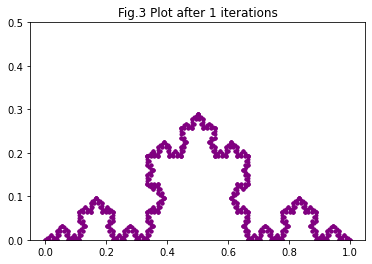

In [10]:
solve(4)